<a href="https://colab.research.google.com/github/HanzhouLiu/Deep-Learning-with-Python-Exercises/blob/main/EmbeddingLayerForWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras

In [4]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [5]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 3ms/step - loss: 0.6862 - acc: 0.5604 - val_loss: 0.6224 - val_acc: 0.6998
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5732 - acc: 0.7419 - val_loss: 0.5268 - val_acc: 0.7324
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4747 - acc: 0.7843 - val_loss: 0.5052 - va

In [19]:
from google.colab import drive
drive.mount('/content/drive')
/content/drive/MyDrive/aclImdb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!unzip /content/drive/MyDrive/aclImdb_v1.zip -d /tmp

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/486_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/482_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/639_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/589_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/696_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/862_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/813_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/806_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/803_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/960_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/956_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/943_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/910_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/901_0.txt  
  inflating: /tmp/aclImdb_v1/aclImdb/train/unsup/1177_0.txt  
  inflating: /tmp/aclImdb_v1/aclI

In [36]:
import os

imdb_dir = '/tmp/aclImdb_v1/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [37]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [38]:
glove_dir = '/content/drive/MyDrive'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [39]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [42]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('/content/drive/MyDrive/636/homework/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 119ms/step - loss: 1.9489 - acc: 0.5235 - val_loss: 0.7537 - val_acc: 0.5008
Epoch 2/10
7/7 [==============================] - 1s 103ms/step - loss: 0.6119 - acc: 0.6071 - val_loss: 1.6346 - val_acc: 0.4970
Epoch 3/10
7/7 [==============================] - 1s 105ms/step - loss: 0.8314 - acc: 0.6114 - val_loss: 0.8222 - val_acc: 0.5053
Epoch 4/10
7/7 [==============================] - 1s 105ms/step - loss: 0.4411 - acc: 0.7149 - val_loss: 1.0825 - val_acc: 0.4977
Epoch 5/10
7/7 [==============================] - 1s 108ms/step - loss: 0.3718 - acc: 0.7895 - val_loss: 0.9229 - val_acc: 0.5069
Epoch 6/10
7/7 [==============================] - 1s 104ms/step - loss: 0.1714 - acc: 0.9470 - val_loss: 1.1272 - val_acc: 0.5016
Epoch 7/10
7/7 [==============================] - 1s 106ms/step - loss: 0.2547 - acc: 0.8954 - val_loss: 0.8216 - val_acc: 0.5390
Epoch 8/10
7/7 [==============================] - 1s 103ms/step - loss: 0.1023 - acc: 0.96

In [49]:
model.save_weights('/content/drive/MyDrive/636/homework/pre_trained_glove_model.h5')

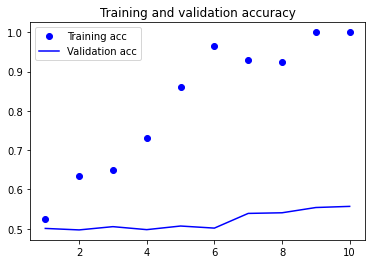

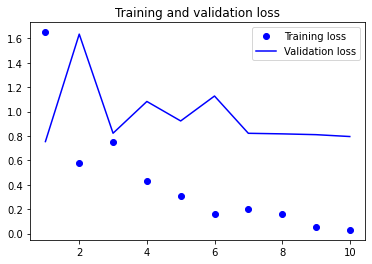

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 131ms/step - loss: 0.6940 - acc: 0.5149 - val_loss: 0.6930 - val_acc: 0.5088
Epoch 2/10
7/7 [==============================] - 1s 109ms/step - loss: 0.5352 - acc: 0.9961 - val_loss: 0.6918 

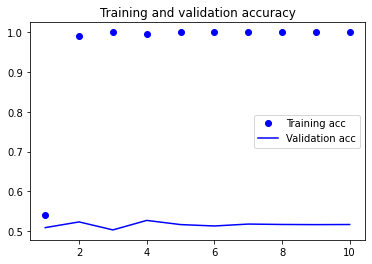

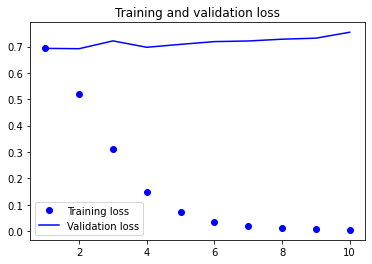

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [48]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7997 - acc: 0.5520


[0.799695611000061, 0.5519599914550781]